<a href="https://colab.research.google.com/github/wrgd01/FTC/blob/master/Copy_of_TRAIN_HS_PD_Lab_16_%5BDEMO%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 16: Generative AI**
---


### **Description**
In this notebook, we demonstrate how we can implement Generative AI models using keras for both NLP and CV tasks.


<br>

### **Structure**
* **Part 1**: [Text Generation with GPT2](#p1)

* **Part 2**: [Image Generation with Stable Diffusion](#p2)

<br>


<a name="p1"></a>

---
## **Part 1: Text Generation with GPT2**
---

In this section, we give an example of how to use a very famous pretrained model for Natural Language Processing - GPT. Specifically, we use this to generate text based on a prompt.

### **Install `keras-nlp`**

In [1]:
!pip install keras-nlp --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.5/576.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.0/728.0 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.5 MB/s eta 0:00:00


### **Import all necessary libraries and functions**

In [2]:
import keras_nlp
from keras_nlp.models import GPT2CausalLMPreprocessor, GPT2CausalLM
from keras.optimizers import *
from keras.losses import SparseCategoricalCrossentropy

import tensorflow_datasets.public_api as tfds
import tensorflow as tf

Using TensorFlow backend


### **Load the GPT2 Model**

In [3]:
preprocessor = GPT2CausalLMPreprocessor.from_preset(
    "gpt2_base_en",
    sequence_length=128,
)


gpt2_lm = GPT2CausalLM.from_preset(
    "gpt2_base_en", preprocessor=preprocessor
)

497986112/497986112 [==============================] - 4s 0us/step


### **Generate Text**

Since the model is pretrained, we can use it "right out of the box". The cell below demonstrates how to generate text based on the prompt `'Learning about machine learning is'`. Feel free to change the prompt!

In [4]:
output = gpt2_lm.generate("Learning about machine learning is", max_length=200)
print("\nGPT-2 output:")
print(output)


GPT-2 output:
Learning about machine learning is a great way to learn about machine learning. It's also an important part of learning about machine learning. Machine learning is the process in which you learn how to learn about a system and how to use those systems to solve a problem. The more you learn about the process of how a system works the faster it learns about itself, and the better your learning of machine learning becomes.

In this post I'll talk about machine learning. I'll also show you what machine learning can do for you. I'll also explain why you need machine learning to understand your own learning.

I hope this is helpful. I'll try to answer all your questions in as short a format as possible.

If you'd like to learn more about Machine Learning and Machine Learning Learning Learning Machine learning is not only a tool for understanding the world. It is also a tool for understanding how to use it. Machine learning is a very powerful tool for understanding how to use i

### **Transfer Learning: Shakespearean Text**

Let's transfer the general knowledge of GPT2 to specifically generate Shakespearean style text.

#### **Load and Format Data**

**NOTE**: This is a very famous dataset to work with in NLP that was used to show the abilities of an older type of NN called RNNs. You can find more information here: http://karpathy.github.io/2015/05/21/rnn-effectiveness/.

In [5]:
d = tfds.load(name='tiny_shakespeare')['train']

training_text = ""
for x in d:
  training_text = str(x['text'].numpy())[1:]

import re

training_text = re.sub('[\';,\"]', '', training_text)
training_text = training_text.split('\\n')

# Remove all speakers (ex: All:)
# and remove all blank lines
new_texts = []
tmp = ""
for text in training_text:
  if not ':' in text and len(text) > 0: tmp += text + ". "
  elif tmp != "":
    new_texts.append(tmp)
    tmp = ""

training_text = new_texts

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/1.0.0.incompleteIKEQKD/tiny_shakespeare-train.tfrecord*..…

Generating validation examples...:   0%|          | 0/1 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/1.0.0.incompleteIKEQKD/tiny_shakespeare-validation.tfreco…

Generating test examples...:   0%|          | 0/1 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/1.0.0.incompleteIKEQKD/tiny_shakespeare-test.tfrecord*...…

Dataset tiny_shakespeare downloaded and prepared to /root/tensorflow_datasets/tiny_shakespeare/1.0.0. Subsequent calls will reuse this data.


#### **View Some Inputs**

In [6]:
for i in range(10):
  print('Line ' + str(i) + ': ' + training_text[i])

Line 0: Before we proceed any further hear me speak.. 
Line 1: Speak speak.. 
Line 2: You are all resolved rather to die than to famish?. 
Line 3: Resolved. resolved.. 
Line 4: First you know Caius Marcius is chief enemy to the people.. 
Line 5: We knowt we knowt.. 
Line 6: Let us kill him and well have corn at our own price.. Ist a verdict?. 
Line 7: One word good citizens.. 
Line 8: We are accounted poor citizens the patricians good.. 
Line 9: would yield us but the superfluity while it were. wholesome we might guess they relieved us humanely. 


#### **Load and Compile the GPT2 Model**

The first two steps are the same as above as we are loading in the generic model. The new part is that we must compile this model so that it can be further trained.

In [7]:
preprocessor = GPT2CausalLMPreprocessor.from_preset(
    "gpt2_base_en",
    sequence_length=128,
)

gpt2_lm_shakespeare = GPT2CausalLM.from_preset(
    "gpt2_base_en", preprocessor=preprocessor
)

# We can just use a number like 0.01,
# but this learning rate changes over time.
# This has been shown to increase performance
# in many cases.
learning_rate = schedules.PolynomialDecay(
    5e-5,
    decay_steps=100,
    end_learning_rate=0.0,
)

gpt2_lm_shakespeare.compile(
    optimizer=Adam(learning_rate),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    weighted_metrics=["accuracy"],
)

#### **Fine Tune the Model**

Now, we can fit the model to our specific training data. Since this dataset and model are both very large, it can take a long time to do so. For this reason, we will only train on the first 1,500 lines (there are over 20,000 in the full dataset).

<br>

**NOTE**: The preprocessing layer that we have used actually produces the y data (label) for us based on the input, so we only have to provide the X data.

In [8]:
gpt2_lm_shakespeare.fit(training_text[:1500], epochs = 3)

Epoch 1/3
47/47 [==============================] - 128s 2s/step - loss: 0.9355 - accuracy: 0.2030
Epoch 2/3
47/47 [==============================] - 38s 818ms/step - loss: 0.8408 - accuracy: 0.2481
Epoch 3/3
47/47 [==============================] - 39s 832ms/step - loss: 0.8265 - accuracy: 0.2542


#### **Generate Text**

A few things to notice about the tendencies of the generated text:
* It uses more Shakespearean language, as would be hoped for.
* It is shorter. This is likely due to the fact that each training instance was a single line, which tends to be pretty short in a play as opposed to paragraphs of text in something like a novel or Wikipedia page.

In [9]:
output = gpt2_lm_shakespeare.generate("Learning about machine learning is")
print("\nGPT-2 output:")
print(output)


GPT-2 output:
Learning about machine learning is very important. 


In [10]:
output = gpt2_lm_shakespeare.generate("Machine learning is")
print("\nGPT-2 output:")
print(output)


GPT-2 output:
Machine learning is the art of the world.. 


In [11]:
output = gpt2_lm_shakespeare.generate("Teaching is")
print("\nGPT-2 output:")
print(output)


GPT-2 output:
Teaching is not the end. 


#### **Generate a Play**

Since we have trained the model to generate individual lines, we could try using this repeatedly to generate a whole play. One way to do this is by using just the last sentence of each output as the prompt for the next one.

In [12]:
num_lines = 10

# Generate the 0th line
line = gpt2_lm_shakespeare.generate("Teaching machine learning is")
print('Line 0: ' + line)

for i in range(num_lines):

  # Get the last sentence of the previous line
  sentences = re.split('[.?!] ', line)
  if sentences[-1] == '': last_sentence = sentences[-1]
  else: last_sentence = sentences[-2]

  # Generate the next line
  line = gpt2_lm_shakespeare.generate(last_sentence)
  print('Line ' + str(i + 1) + ': ' + re.sub(last_sentence, '', line))

Line 0: Teaching machine learning is the best way. I know you cannot tell the truth of it. But it is true that I know you. I am well known and well respected among the people. 
Line 1: A good and noble man. And a good and noble man. 
Line 2: I have heard your words. 
Line 3: I will give you a good word. You will not hear me speak of your friends.. 
Line 4: The city is in a great state. I have heard it said that the Romans have been very good in their conduct. But that they are not to be trusted with it.. 
Line 5: You have not been so good as I. I have been. I cannot but say it is. A very good time indeed. I am glad to hear you say it. 
Line 6: The people of this city do not have a right to the senate. They are to have a vote. They are to be sworn to. The people.. 
Line 7: We have no power to do it. We have no power to do what we have. 
Line 8: The gods of this world have not made him. 
Line 9: The gods have given you. I will tell you. You must know. That you must. be a slave to my gods

<a name="p2"></a>

---
## **Part 2: Image Generation with Stable Diffusion**
---

In this section, we given an example of how to use a very famous pretrained model for Computer Vision - Stable Diffusion. Specifically, we will use this to generate images based on a prompt.

### **Install `keras-cv`**

In [13]:
!pip install keras-cv tensorflow keras-core --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 13.9 MB/s eta 0:00:00


### **Import all necessary libraries and functions**

In [14]:
import keras
import keras_cv
from keras_cv.models import StableDiffusion

import matplotlib.pyplot as plt

### **Load the Stable Diffusion Model**

In [15]:
model = StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


### **Generate Images**

Since the model is pretrained, we can use it "right out of the box". The cells below demonstrates how to generate text based on the prompts `'photograph of an astronaut riding a horse'` (a classic) and `'high school students learning machine learning'`. Feel free to change the prompts!

198180272/198180272 [==============================] - 1s 0us/step


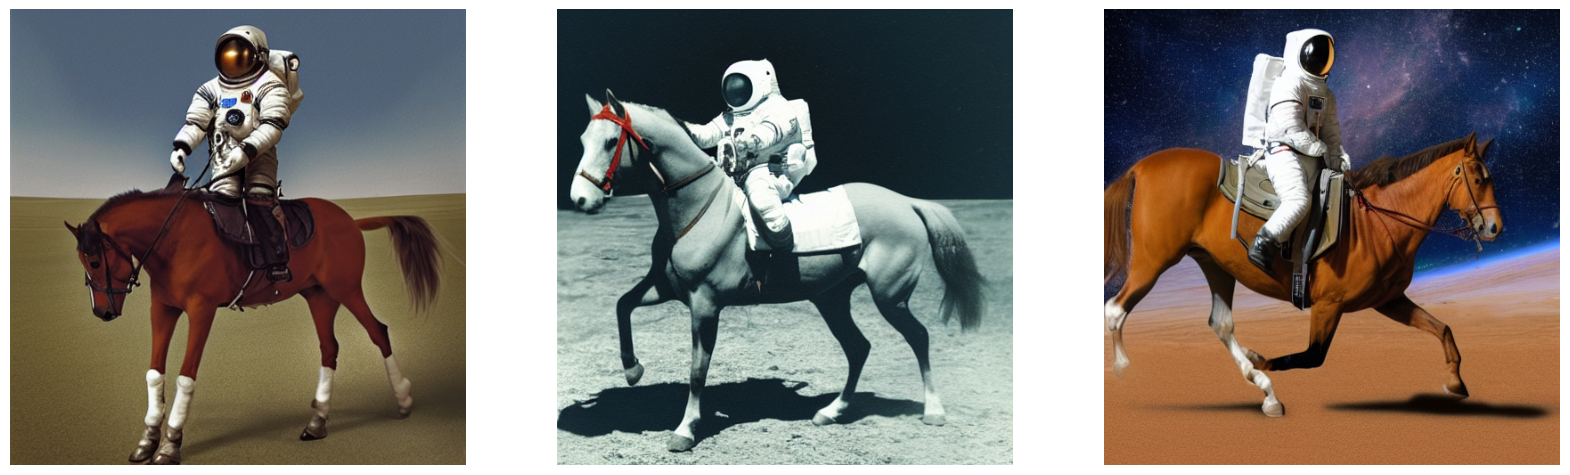

In [16]:
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

50/50 [==============================] - 121s 2s/step


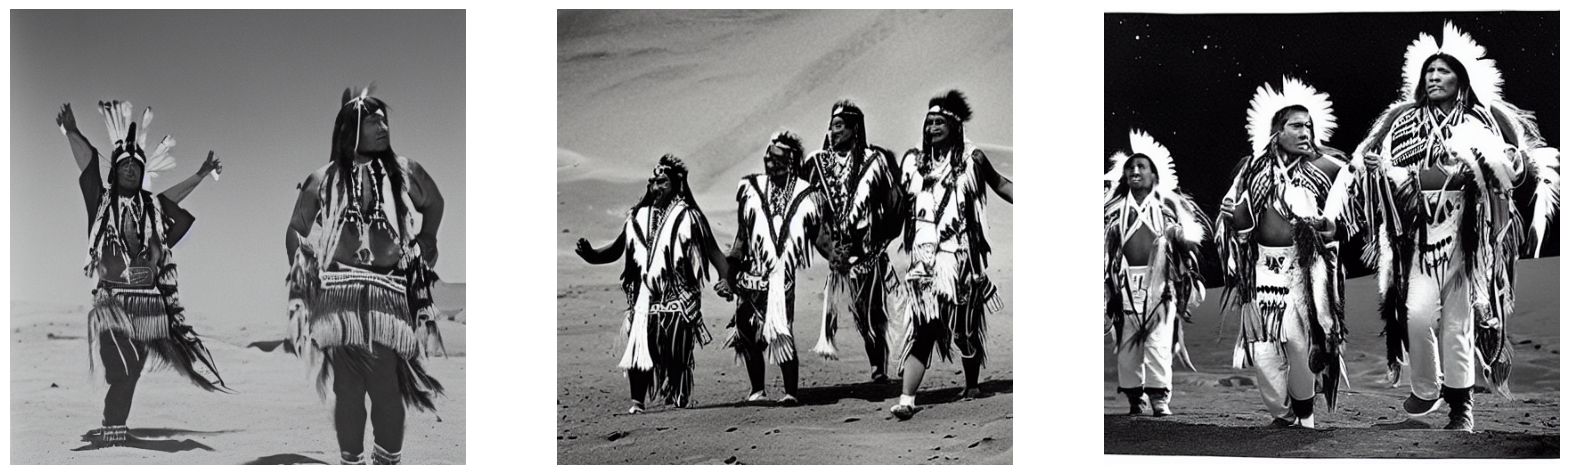

In [19]:
images = model.text_to_image("Native American dancers on the moon", batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

#End of notebook
---
© 2023 The Coding School, All rights reserved